In [17]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
from dynamic_drone import *

In [19]:
import matplotlib.pyplot as plt


In [20]:
def simulation(drone_controller, xyz_target_arr, psi_arr, dt = 1/30, show=True, callback=None):
    '''
    omega_arr: length x 4 matrix
    '''
    
    assert xyz_target_arr.shape[0] == psi_arr.shape[0]
    length = xyz_target_arr.shape[0]
    
    #length = omega_arr.shape[0]
    xyz_arr = np.zeros([length, 3])
    rpy_arr = np.zeros([length, 3])
    v_xyz_arr = np.zeros([length, 3])
    v_rpy_arr = np.zeros([length, 3])
    a_xyz_arr = np.zeros([length, 3])
    a_rpy_arr = np.zeros([length, 3])
    omega_arr = np.zeros([length, 4])
    
    #dt=1/30
    
    for i in range(length):
        #omega = np.array([1.0, 1.0, 1.0, 1.0]) * 2
        #omega = omega_arr[i]
        #a_xyz, a_rpy = drone.step(omega, dt)
        
        xyz_target = xyz_target_arr[i]
        psi_target = psi_arr[i]
        
        omega, a_xyz, a_rpy = drone_controller.step(xyz_target, psi_target, dt)
        
        drone = drone_controller.drone
        
        xyz_arr[i,:] = drone.xyz
        rpy_arr[i,:] = drone.rpy
        v_xyz_arr[i,:] = drone.v_xyz
        v_rpy_arr[i,:] = drone.v_rpy
        a_xyz_arr[i,:] = a_xyz
        a_rpy_arr[i,:] = a_rpy
        omega_arr[i,:] = omega
        
        if callback:
            callback(drone.xyz, drone.rpy, drone.v_xyz, drone.v_rpy, a_xyz, a_rpy)
    
    
    name_list = ['X','Y','Z',
                 'r','p','y',
                 "v_X","v_Y","v_Z",
                 "v_r","v_p","v_y",
                 'a_X','a_Y','a_Z',
                 'a_r','a_p','a_y',
                 'omega1','omega2','omega3','omega3']
    arr_list = [xyz_arr[:,0], xyz_arr[:,1], xyz_arr[:,2],
                rpy_arr[:,0], rpy_arr[:,1], rpy_arr[:,2],
                v_xyz_arr[:,0], v_xyz_arr[:,1], v_xyz_arr[:,2],
                v_rpy_arr[:,0], v_rpy_arr[:,1], v_rpy_arr[:,2],
                a_xyz_arr[:,0], a_xyz_arr[:,1], a_xyz_arr[:,2],
                a_rpy_arr[:,0], a_rpy_arr[:,1], a_rpy_arr[:,2],
                omega_arr[:,0], omega_arr[:,1], omega_arr[:,2], omega_arr[:,3]]
    
    
    for name, arr in zip(name_list, arr_list):
        if isinstance(show, (list, tuple, set)) or not show:
            if name not in show:
                continue
        plt.plot(arr)
        plt.title(name)
        plt.show()
            
    return {'name_list': name_list,
            'arr_list': arr_list,
            'xyz_arr': xyz_arr,
            'rpy_arr': rpy_arr,
            'v_xyz_arr': v_xyz_arr,
            'v_rpy_arr': v_rpy_arr,
            'a_xyz_arr': a_xyz_arr,
            'a_rpy_arr': a_rpy_arr,
            'omega_arr': omega_arr}


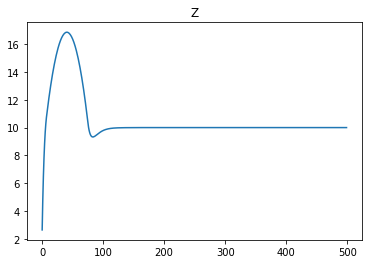

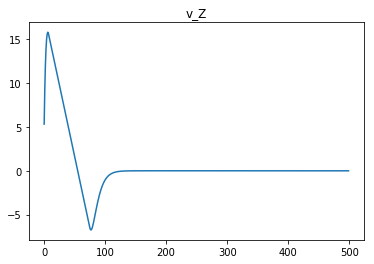

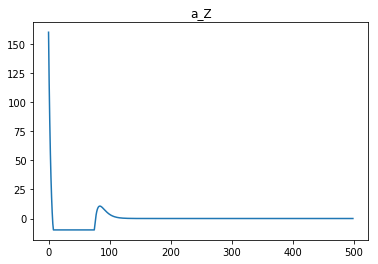

In [21]:
xyz = np.array([0.0, 0.0, 0.0])
rpy = np.array([0.0, 0.0, 0.0])
drone = Drone(xyz, rpy, v_xyz=(0,0,0), v_rpy=(0,0,0), 
                 I=(1,1,1), m=1, b=1, l=1, d=1)
controller_xyz = PIDControler(16.0, 0.01, 0.0001)
controller_rpy = PIDControler(16.0, 0.01, 0.0001)
drone_controller = DroneController(drone, controller_xyz, controller_rpy)

length = 500
xyz_target_arr = np.zeros([length, 3])
xyz_target_arr[:,2] = 10
#rpy_target_arr = np.zeros([length, 3])
psi_target_arr = np.zeros(length)

res = simulation(drone_controller, xyz_target_arr, psi_target_arr, show=['Z','v_Z','a_Z'])

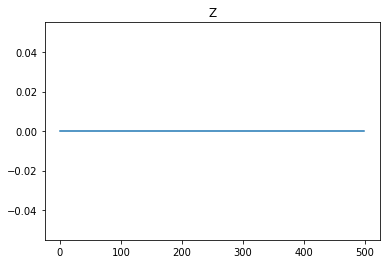

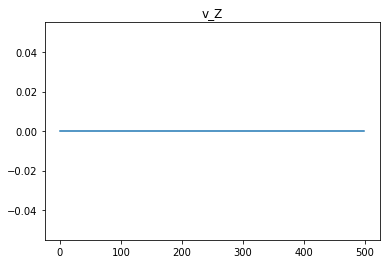

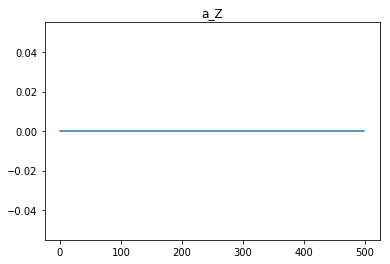

In [22]:
xyz = np.array([0.0, 0.0, 0.0])
rpy = np.array([0.0, 0.0, 0.0])
drone = Drone(xyz, rpy, v_xyz=(0,0,0), v_rpy=(0,0,0), 
                 I=(1,1,1), m=1, b=1, l=1, d=1)
controller_xyz = PIDControler(32.0, 0.01, 0.0001)
controller_rpy = PIDControler(32.0, 0.01, 0.0001)
drone_controller = DroneController(drone, controller_xyz, controller_rpy)

length = 500
xyz_target_arr = np.zeros([length, 3])
#rpy_target_arr = np.zeros([length, 3])
psi_target_arr = np.zeros(length)

res = simulation(drone_controller, xyz_target_arr, psi_target_arr, show=['Z','v_Z','a_Z'])

这个倒是开始超调越来越大了随着比例系数增加，之前不是这样。

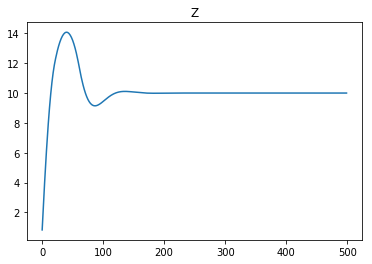

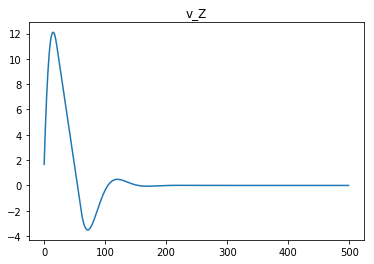

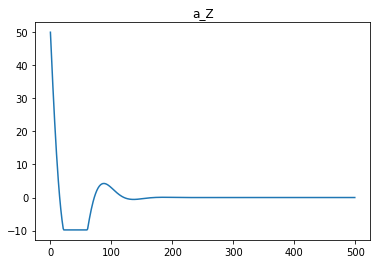

In [23]:
xyz = np.array([0.0, 0.0, 0.0])
rpy = np.array([0.0, 0.0, 0.0])
drone = Drone(xyz, rpy, v_xyz=(0,0,0), v_rpy=(0,0,0), 
                 I=(1,1,1), m=1, b=1, l=1, d=1)
controller_xyz = PIDControler(5.0, 0.01, 0.0001)
controller_rpy = PIDControler(5.0, 0.01, 0.0001)
drone_controller = DroneController(drone, controller_xyz, controller_rpy)

length = 500
xyz_target_arr = np.zeros([length, 3])
xyz_target_arr[:,2] = 10
#rpy_target_arr = np.zeros([length, 3])
psi_target_arr = np.zeros(length)

res = simulation(drone_controller, xyz_target_arr, psi_target_arr, show=['Z','v_Z','a_Z'])

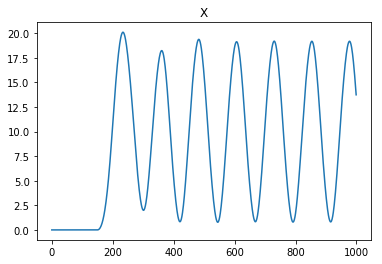

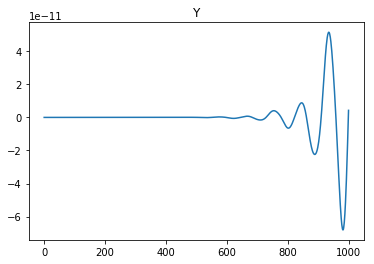

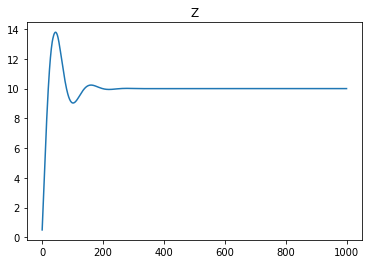

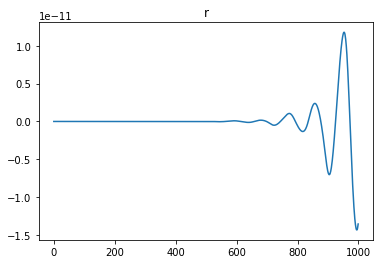

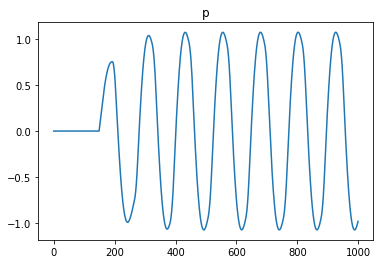

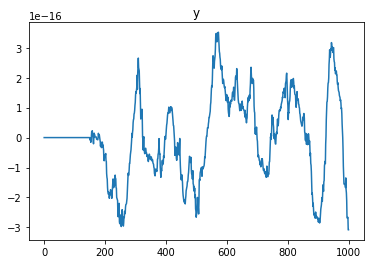

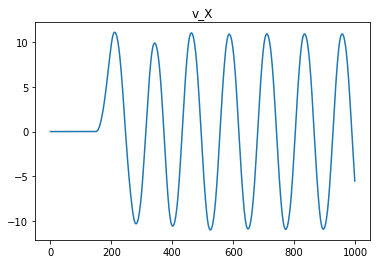

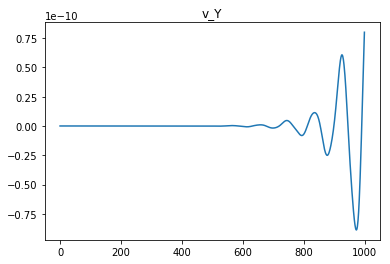

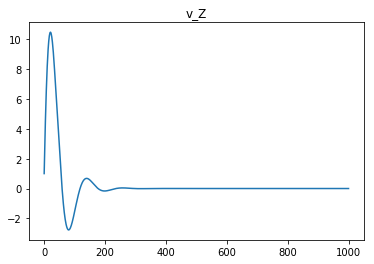

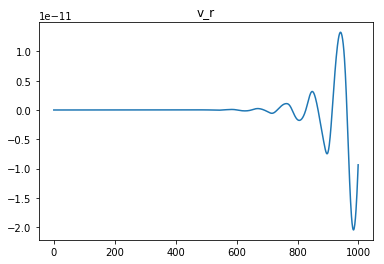

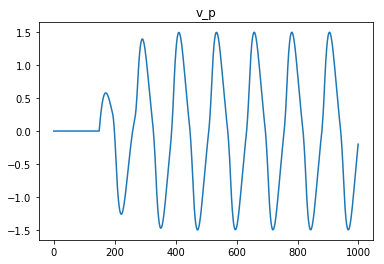

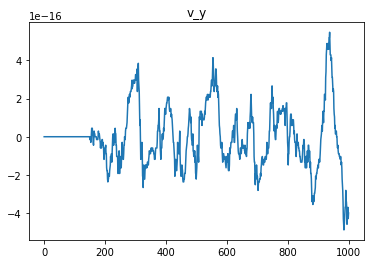

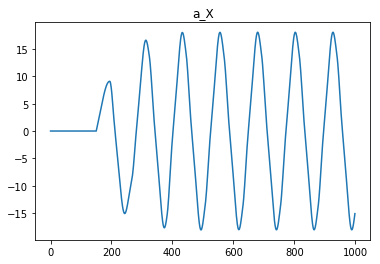

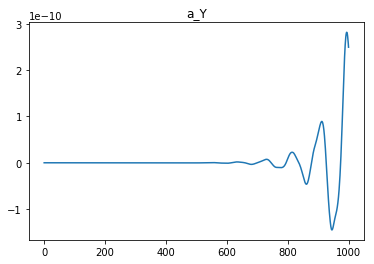

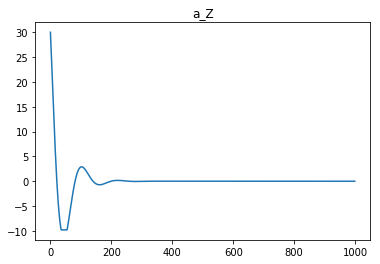

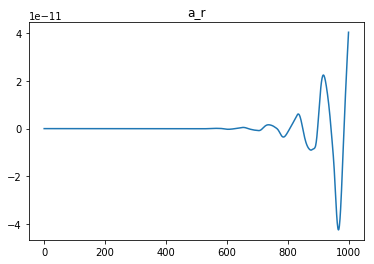

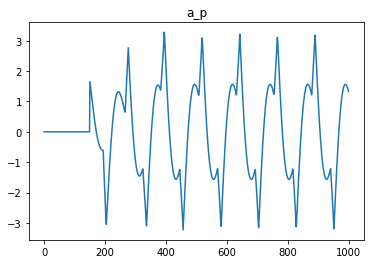

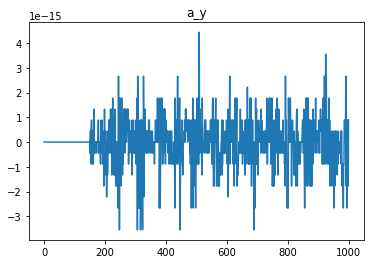

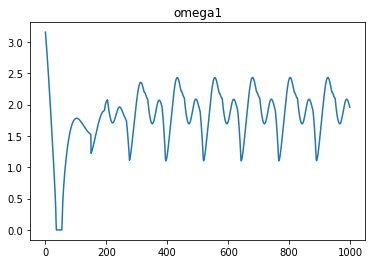

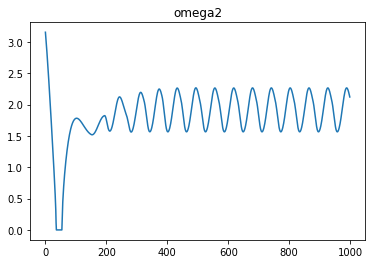

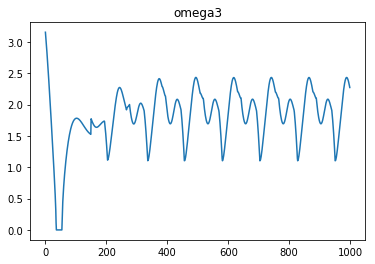

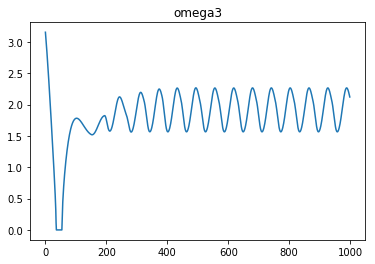

In [24]:
xyz = np.array([0.0, 0.0, 0.0])
rpy = np.array([0.0, 0.0, 0.0])
drone = Drone(xyz, rpy, v_xyz=(0,0,0), v_rpy=(0,0,0), 
                 I=(1,1,1), m=1, b=1, l=1, d=1)
controller_xyz = PIDControler(3.0, 0.001, 0.0001)
controller_rpy = PIDControler(3.0, 0.001, 0.0001)
drone_controller = DroneController(drone, controller_xyz, controller_rpy)

length = 1000

xyz_target_arr = np.zeros([length, 3])
xyz_target_arr[:,2] = 10
xyz_target_arr[150:,0] = 10

#rpy_target_arr = np.zeros([length, 3])
psi_target_arr = np.zeros(length)

res = simulation(drone_controller, xyz_target_arr, psi_target_arr)

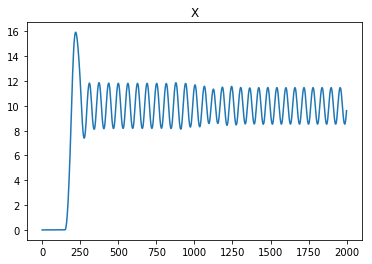

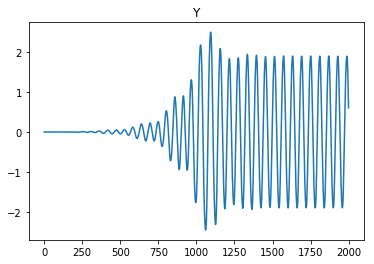

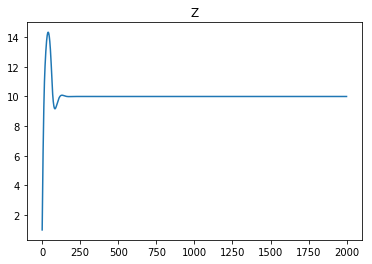

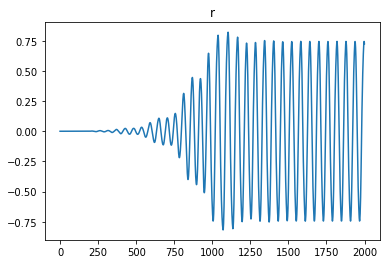

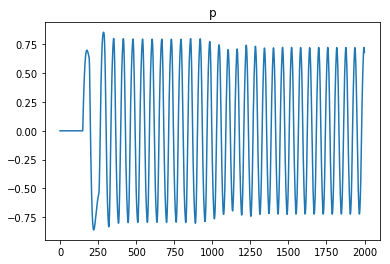

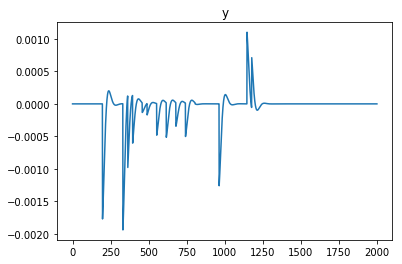

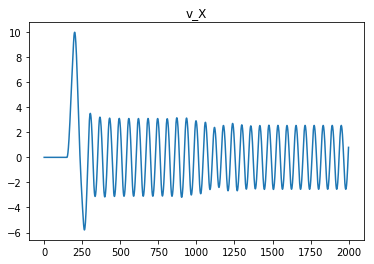

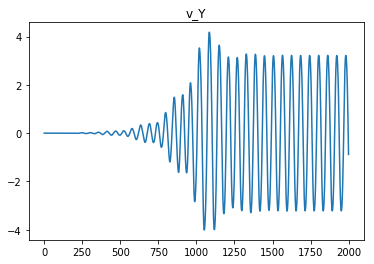

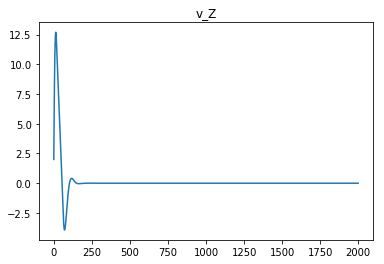

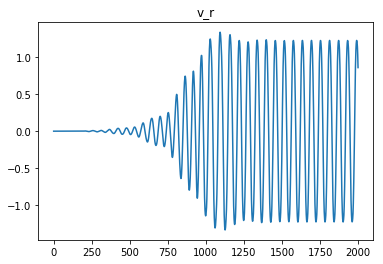

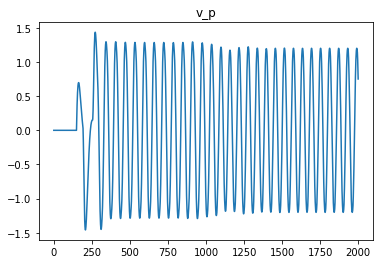

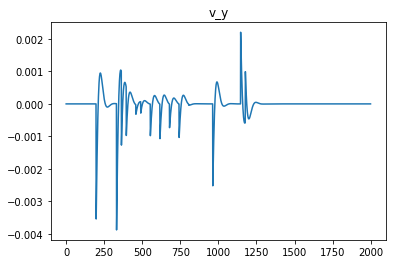

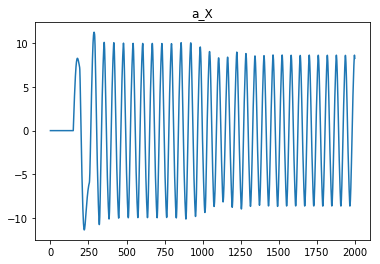

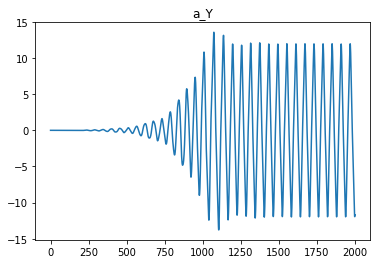

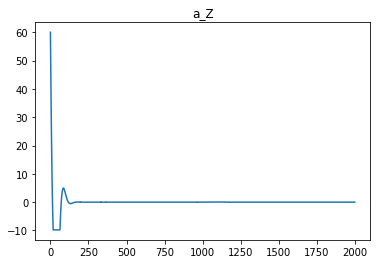

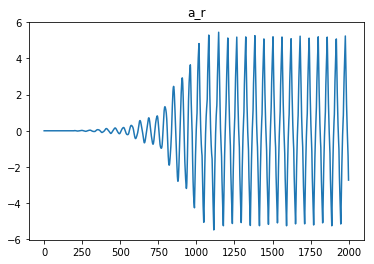

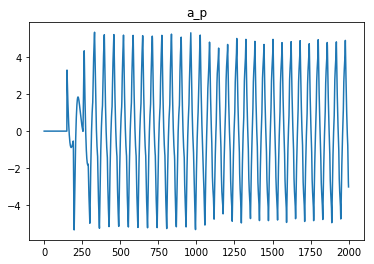

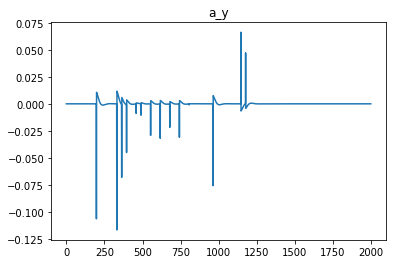

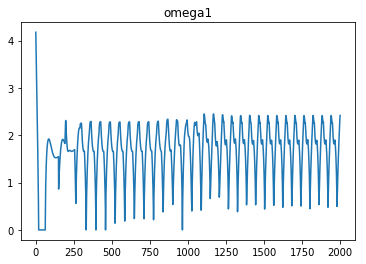

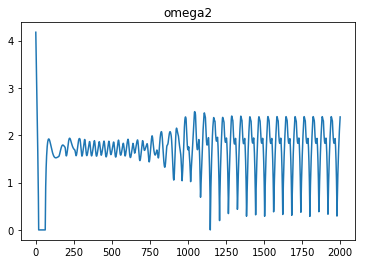

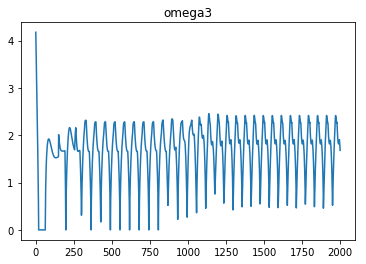

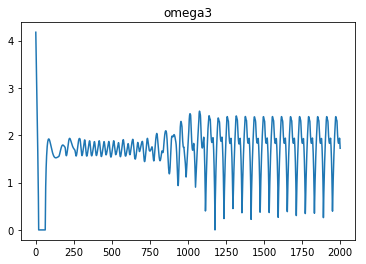

In [26]:
xyz = np.array([0.0, 0.0, 0.0])
rpy = np.array([0.0, 0.0, 0.0])
drone = Drone(xyz, rpy, v_xyz=(0,0,0), v_rpy=(0,0,0), 
                 I=(1,1,1), m=1, b=1, l=1, d=1)
controller_xyz = PIDControler(6.0, 0.001, 0.0001)
controller_rpy = PIDControler(6.0, 0.001, 0.0001)
drone_controller = DroneController(drone, controller_xyz, controller_rpy)

length = 2000

xyz_target_arr = np.zeros([length, 3])
xyz_target_arr[:,2] = 10
xyz_target_arr[150:,0] = 10

#rpy_target_arr = np.zeros([length, 3])
psi_target_arr = np.zeros(length)

res = simulation(drone_controller, xyz_target_arr, psi_target_arr)

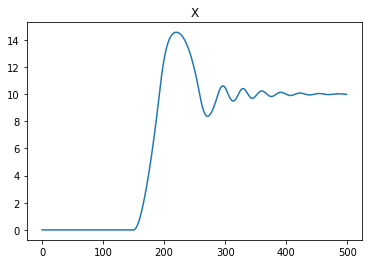

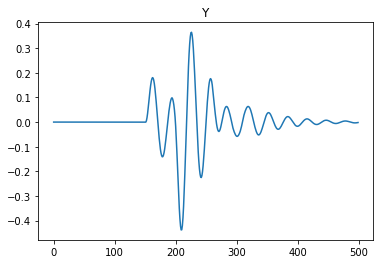

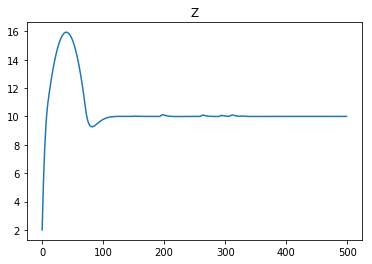

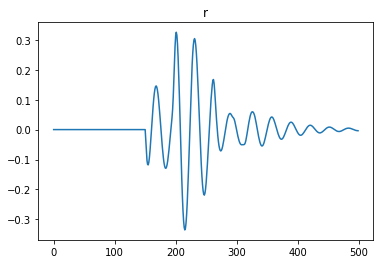

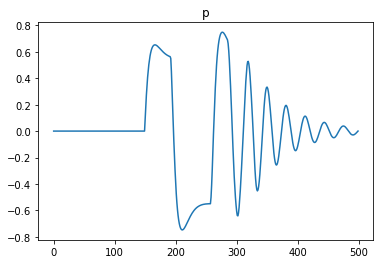

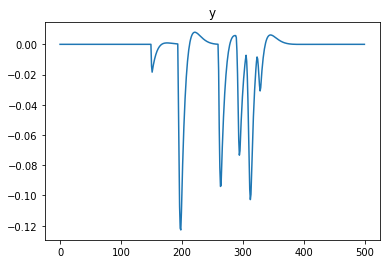

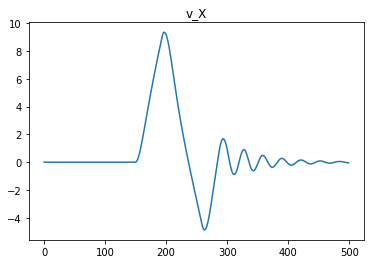

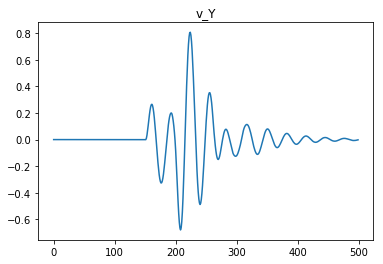

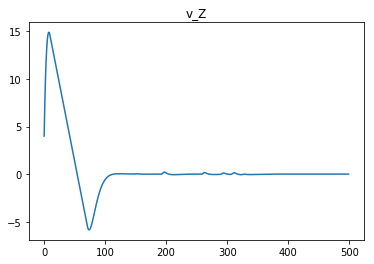

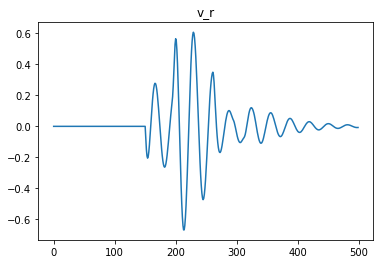

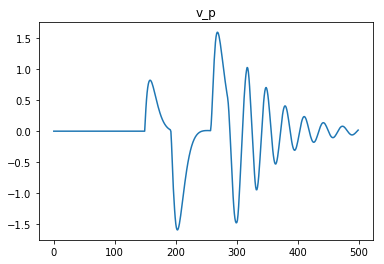

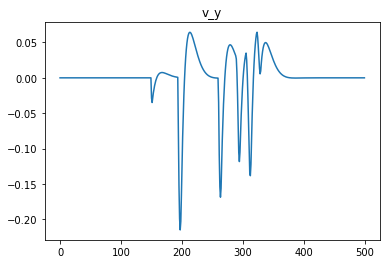

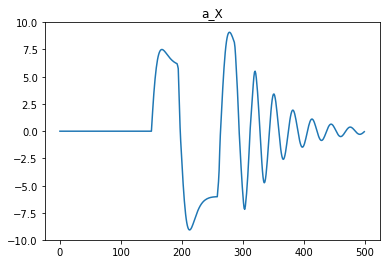

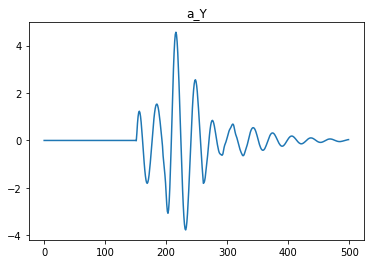

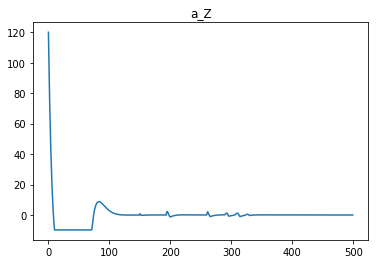

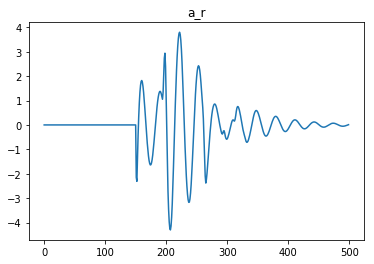

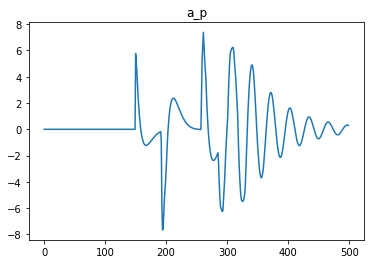

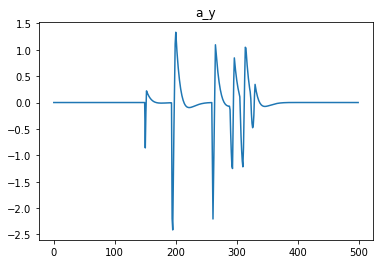

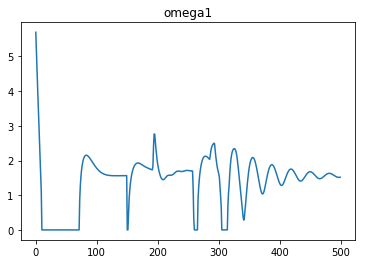

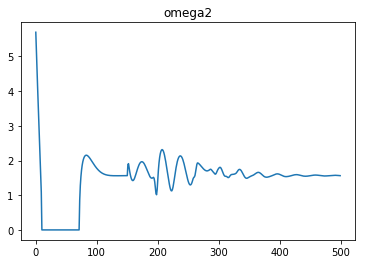

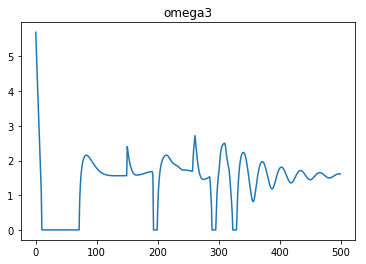

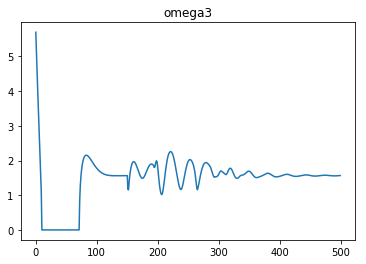

In [27]:
xyz = np.array([0.0, 0.0, 0.0])
rpy = np.array([0.0, 0.0, 0.0])
drone = Drone(xyz, rpy, v_xyz=(0,0,0), v_rpy=(0,0,0), 
                 I=(1,1,1), m=1, b=1, l=1, d=1)
controller_xyz = PIDControler(12.0, 0.001, 0.0001)
controller_rpy = PIDControler(12.0, 0.001, 0.0001)
drone_controller = DroneController(drone, controller_xyz, controller_rpy)

length = 500

xyz_target_arr = np.zeros([length, 3])
xyz_target_arr[:,2] = 10
xyz_target_arr[150:,0] = 10

#rpy_target_arr = np.zeros([length, 3])
psi_target_arr = np.zeros(length)

res = simulation(drone_controller, xyz_target_arr, psi_target_arr)

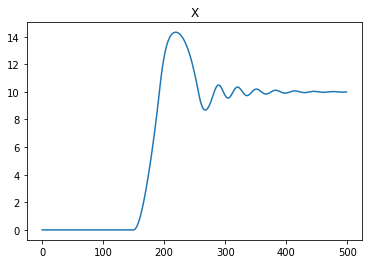

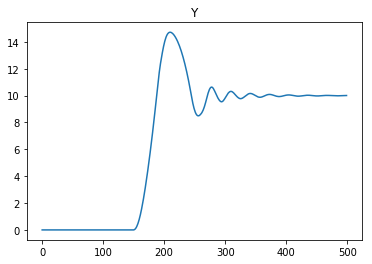

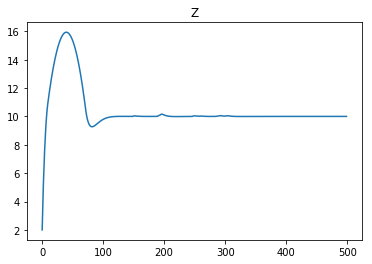

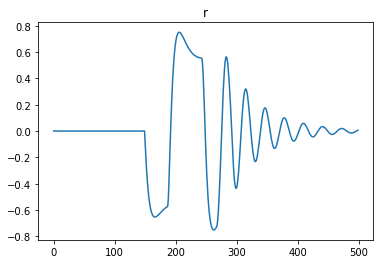

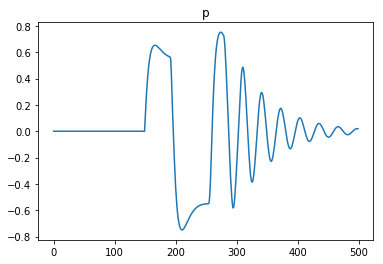

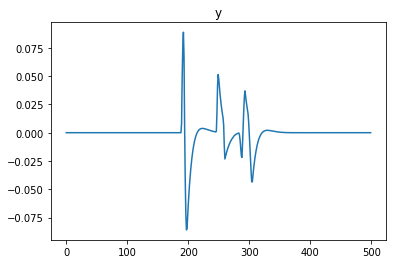

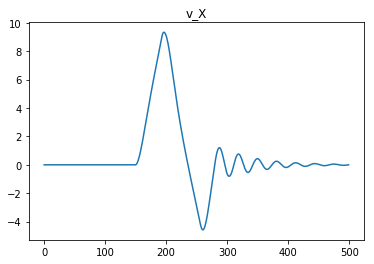

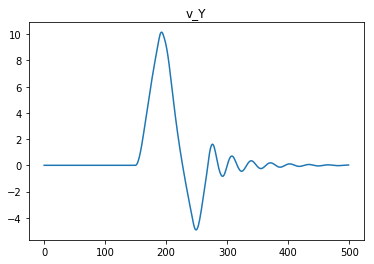

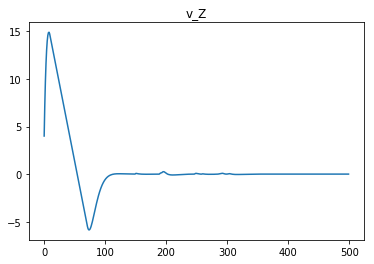

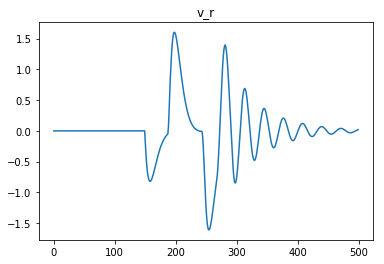

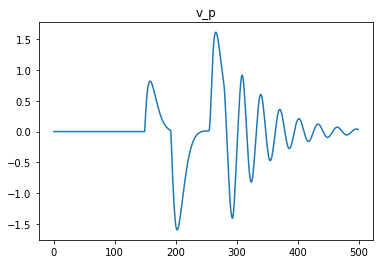

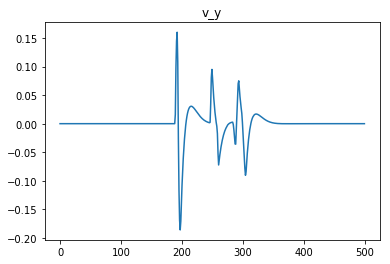

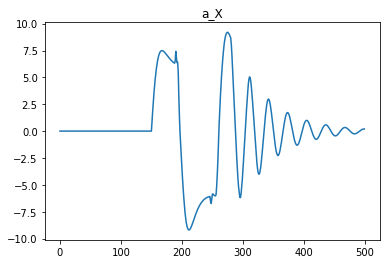

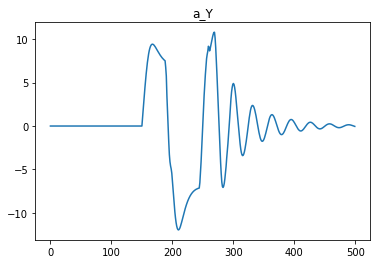

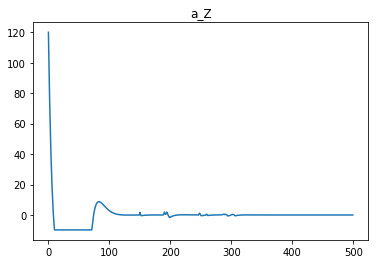

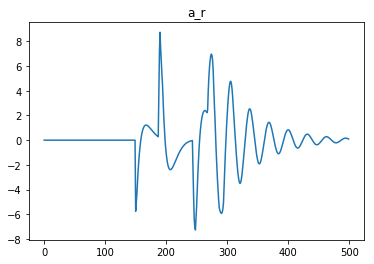

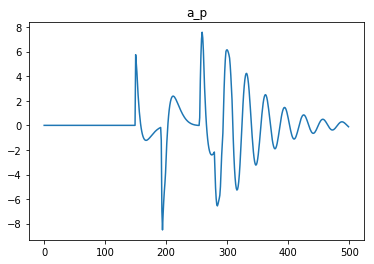

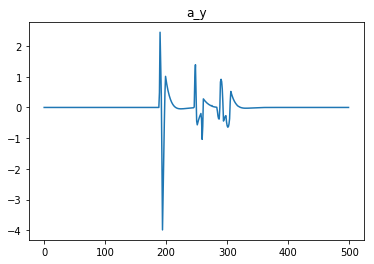

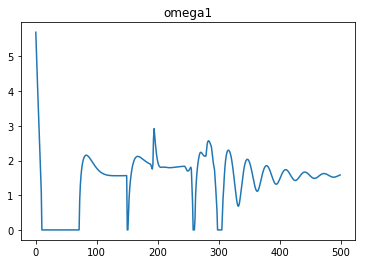

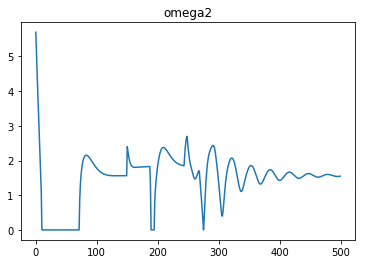

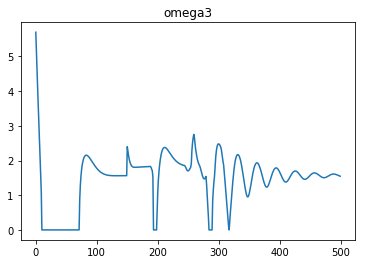

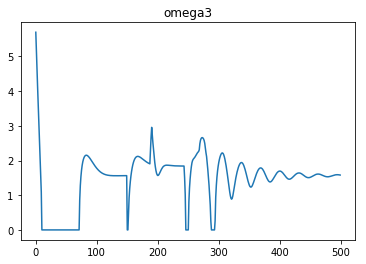

In [28]:
xyz = np.array([0.0, 0.0, 0.0])
rpy = np.array([0.0, 0.0, 0.0])
drone = Drone(xyz, rpy, v_xyz=(0,0,0), v_rpy=(0,0,0), 
                 I=(1,1,1), m=1, b=1, l=1, d=1)
controller_xyz = PIDControler(12.0, 0.001, 0.0001)
controller_rpy = PIDControler(12.0, 0.001, 0.0001)
drone_controller = DroneController(drone, controller_xyz, controller_rpy)

length = 500

xyz_target_arr = np.zeros([length, 3])
xyz_target_arr[:,2] = 10
xyz_target_arr[150:,0] = 10
xyz_target_arr[150:,1] = 10

#rpy_target_arr = np.zeros([length, 3])
psi_target_arr = np.zeros(length)

res = simulation(drone_controller, xyz_target_arr, psi_target_arr)

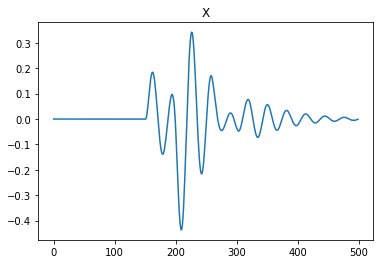

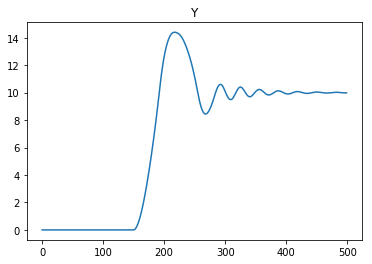

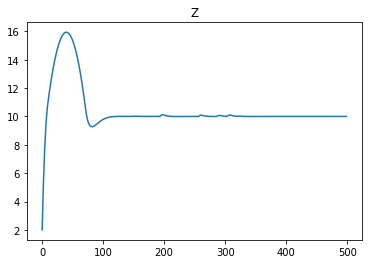

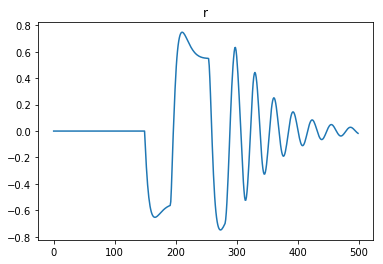

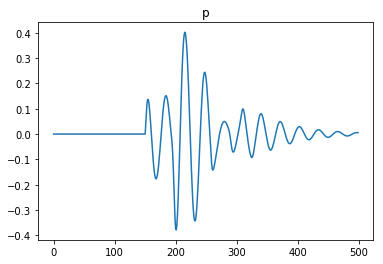

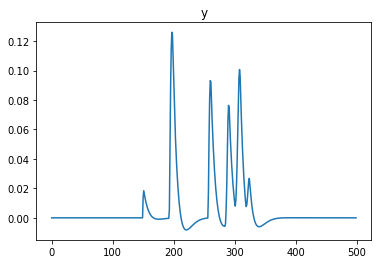

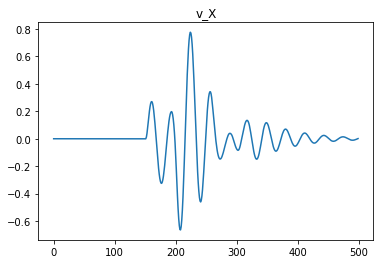

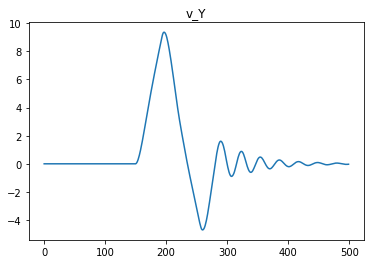

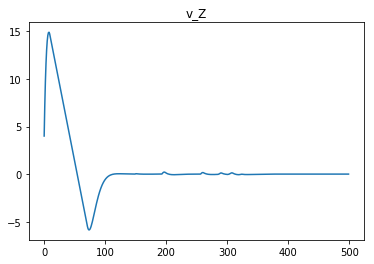

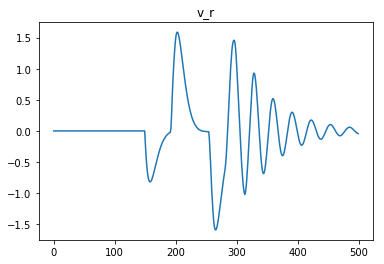

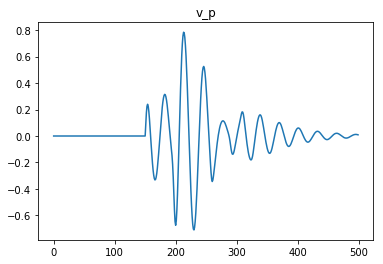

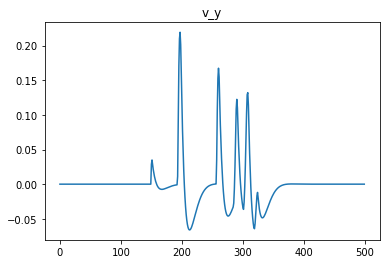

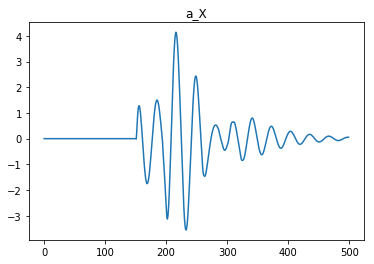

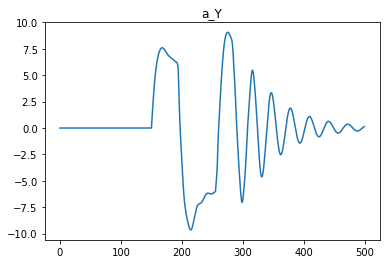

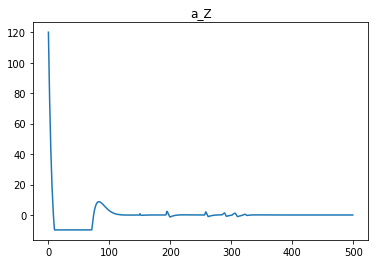

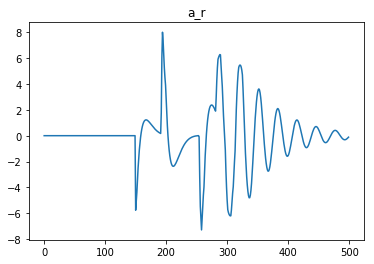

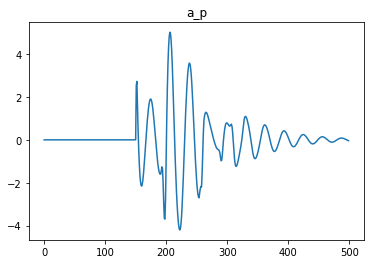

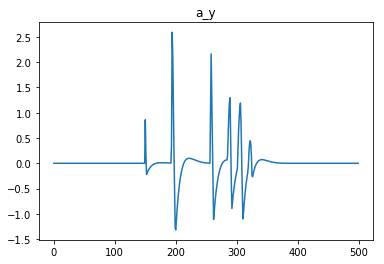

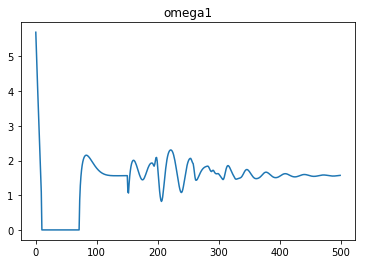

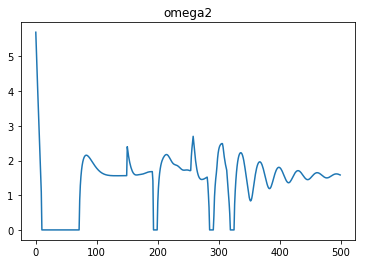

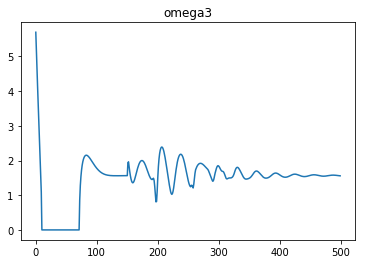

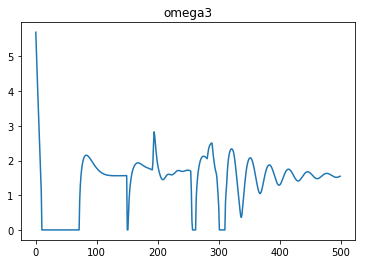

In [29]:
xyz = np.array([0.0, 0.0, 0.0])
rpy = np.array([0.0, 0.0, 0.0])
drone = Drone(xyz, rpy, v_xyz=(0,0,0), v_rpy=(0,0,0), 
                 I=(1,1,1), m=1, b=1, l=1, d=1)
controller_xyz = PIDControler(12.0, 0.001, 0.0001)
controller_rpy = PIDControler(12.0, 0.001, 0.0001)
drone_controller = DroneController(drone, controller_xyz, controller_rpy)

length = 500

xyz_target_arr = np.zeros([length, 3])
xyz_target_arr[:,2] = 10
#xyz_target_arr[150:,0] = 10
xyz_target_arr[150:,1] = 10

#rpy_target_arr = np.zeros([length, 3])
psi_target_arr = np.zeros(length)

res = simulation(drone_controller, xyz_target_arr, psi_target_arr)

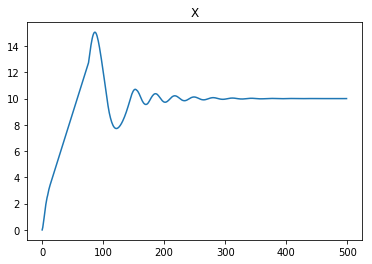

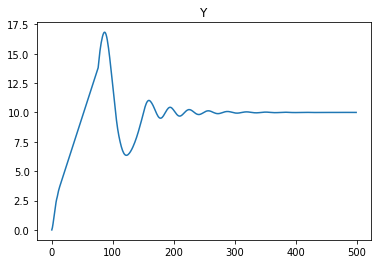

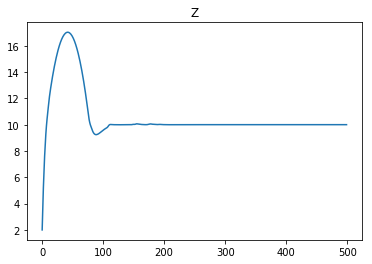

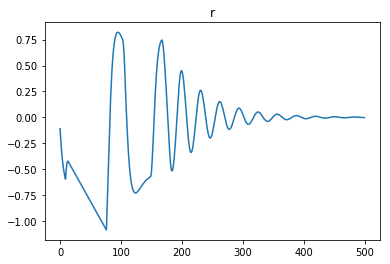

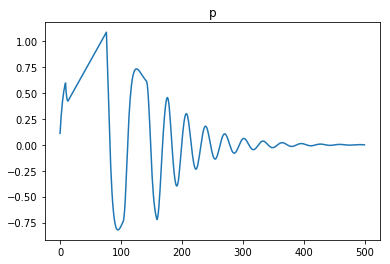

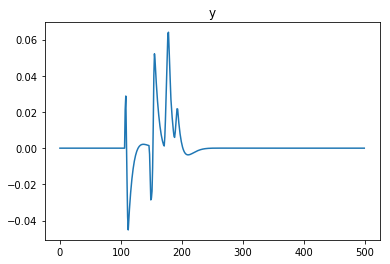

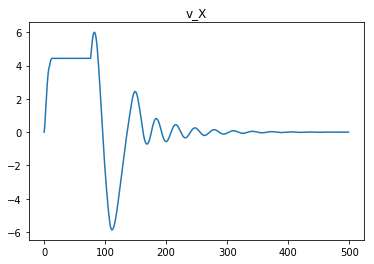

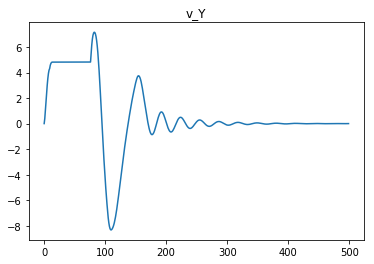

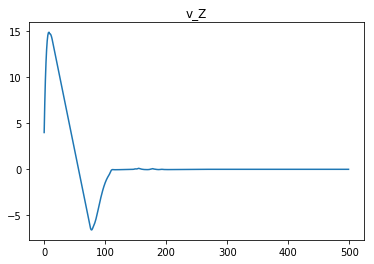

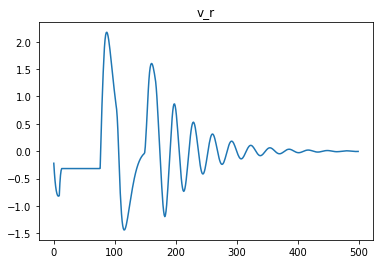

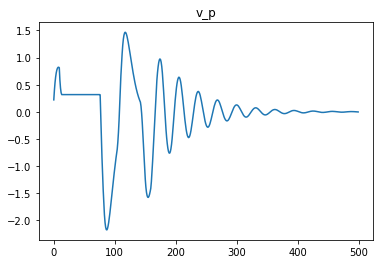

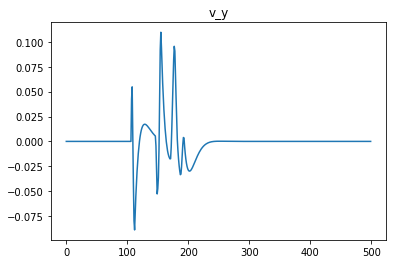

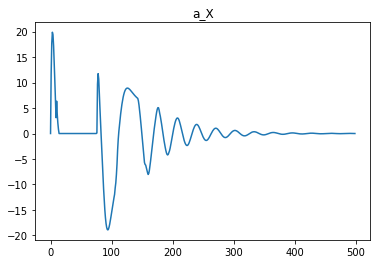

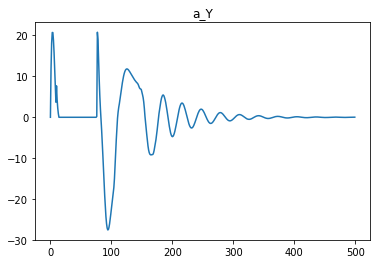

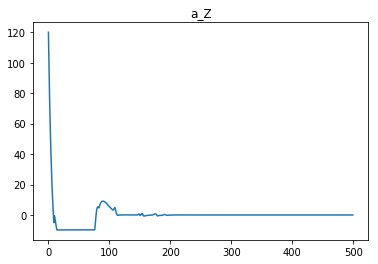

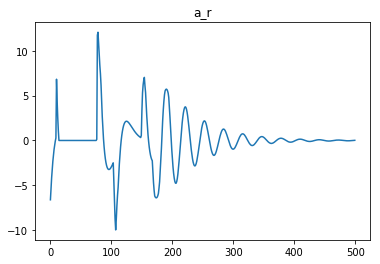

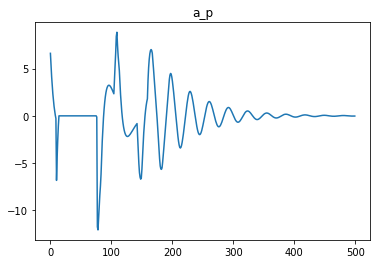

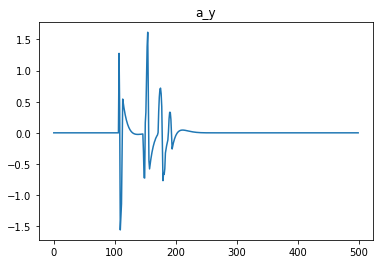

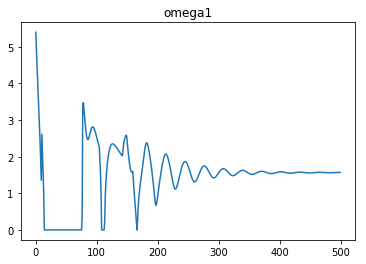

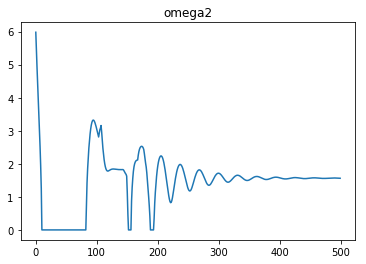

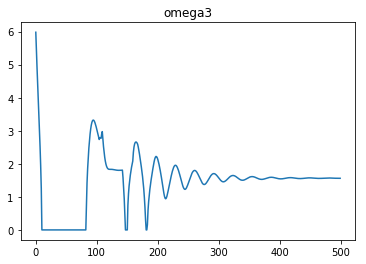

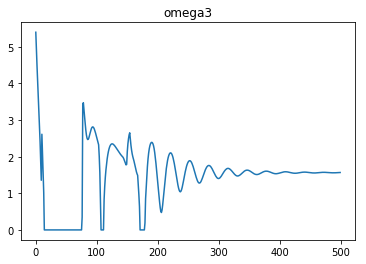

In [30]:
xyz = np.array([0.0, 0.0, 0.0])
rpy = np.array([0.0, 0.0, 0.0])
drone = Drone(xyz, rpy, v_xyz=(0,0,0), v_rpy=(0,0,0), 
                 I=(1,1,1), m=1, b=1, l=1, d=1)
controller_xyz = PIDControler(12.0, 0.001, 0.0001)
controller_rpy = PIDControler(12.0, 0.001, 0.0001)
drone_controller = DroneController(drone, controller_xyz, controller_rpy)

length = 500

xyz_target_arr = np.zeros([length, 3])
xyz_target_arr[:,2] = 10
xyz_target_arr[:,0] = 10
xyz_target_arr[:,1] = 10

#rpy_target_arr = np.zeros([length, 3])
psi_target_arr = np.zeros(length)

res = simulation(drone_controller, xyz_target_arr, psi_target_arr)

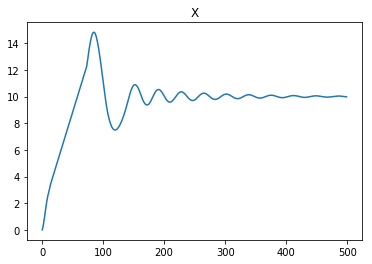

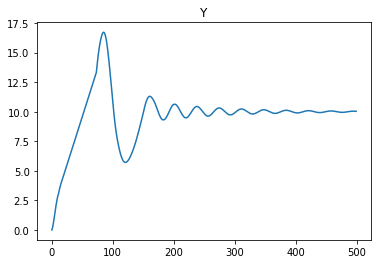

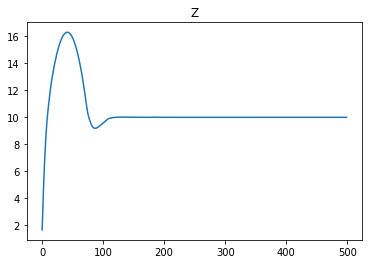

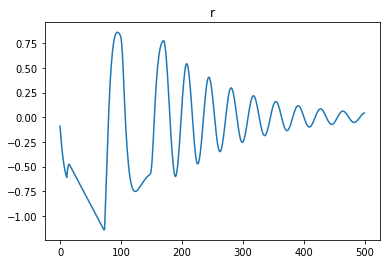

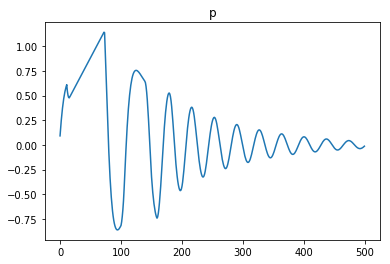

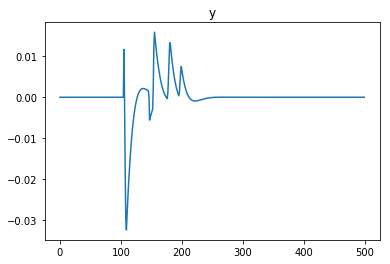

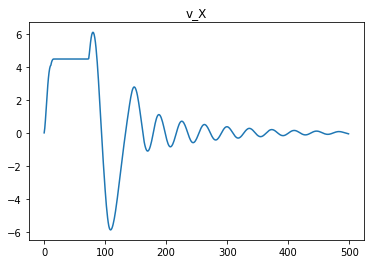

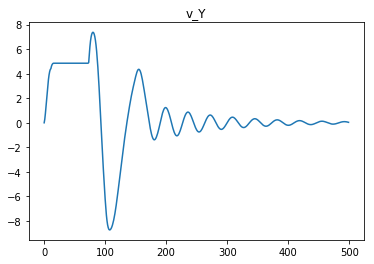

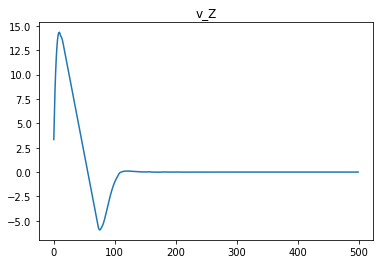

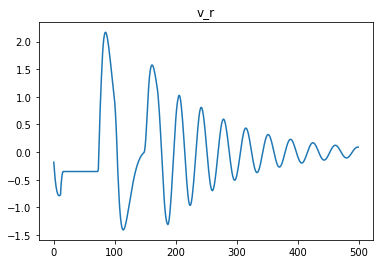

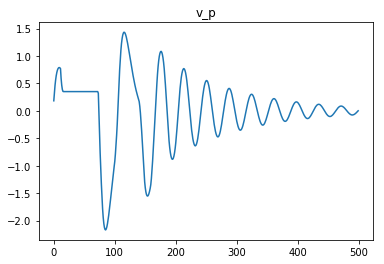

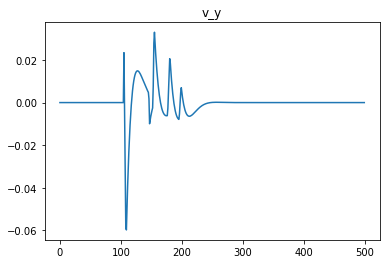

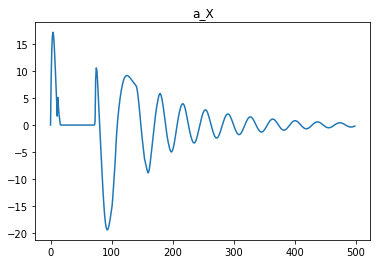

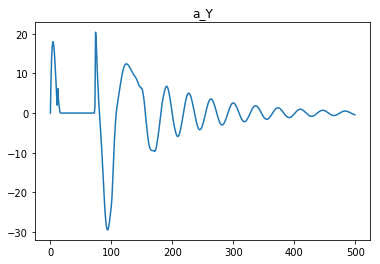

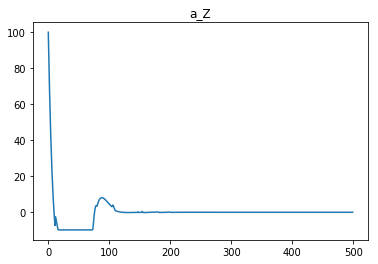

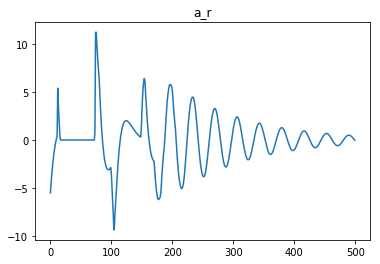

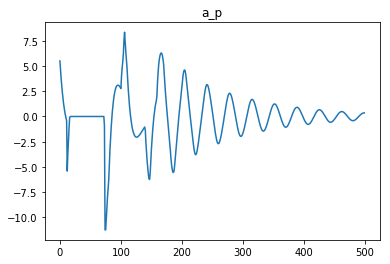

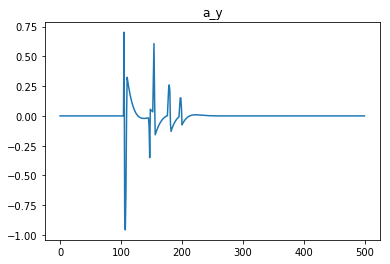

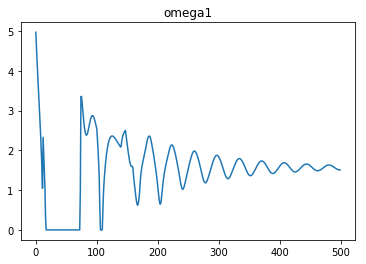

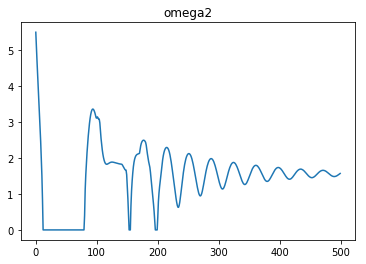

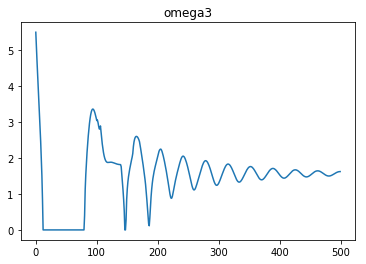

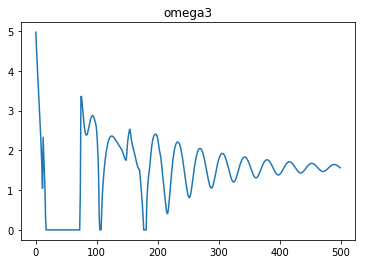

In [31]:
xyz = np.array([0.0, 0.0, 0.0])
rpy = np.array([0.0, 0.0, 0.0])
drone = Drone(xyz, rpy, v_xyz=(0,0,0), v_rpy=(0,0,0), 
                 I=(1,1,1), m=1, b=1, l=1, d=1)
controller_xyz = PIDControler(10.0, 0.001, 0.0001)
controller_rpy = PIDControler(10.0, 0.001, 0.0001)
drone_controller = DroneController(drone, controller_xyz, controller_rpy)

length = 500

xyz_target_arr = np.zeros([length, 3])
xyz_target_arr[:,2] = 10
xyz_target_arr[:,0] = 10
xyz_target_arr[:,1] = 10

#rpy_target_arr = np.zeros([length, 3])
psi_target_arr = np.zeros(length)

res = simulation(drone_controller, xyz_target_arr, psi_target_arr)

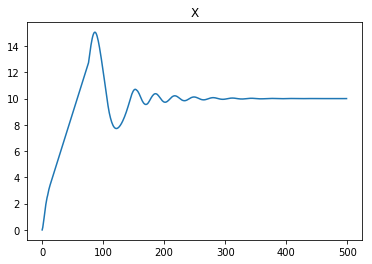

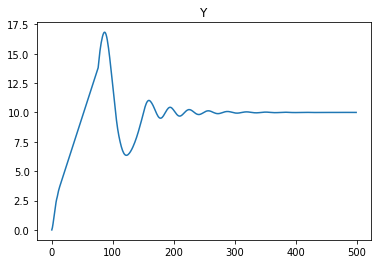

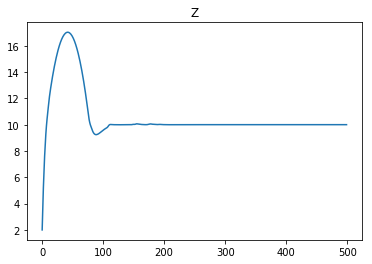

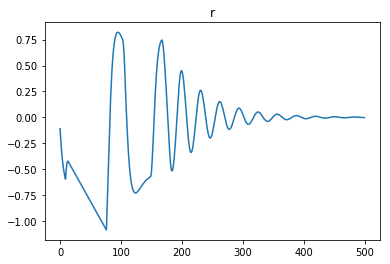

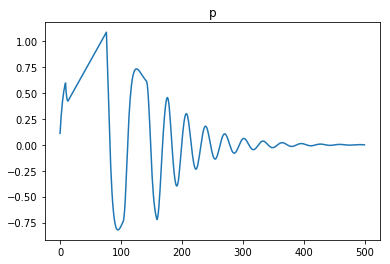

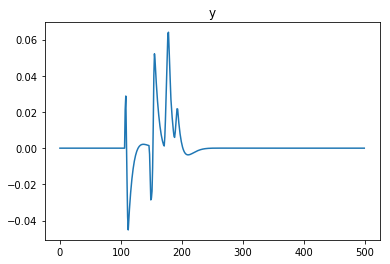

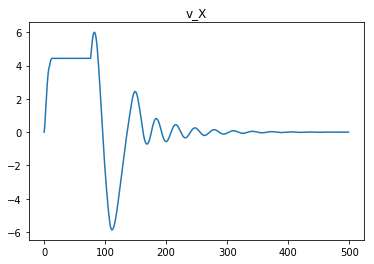

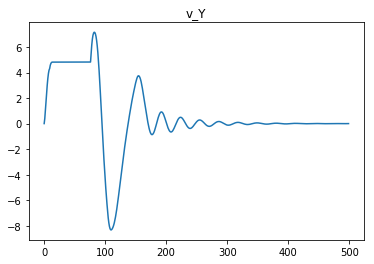

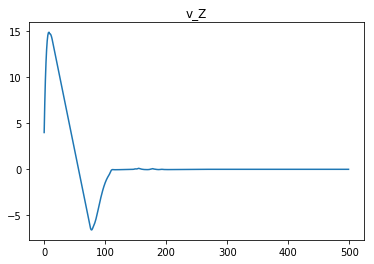

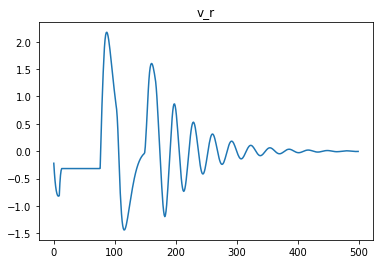

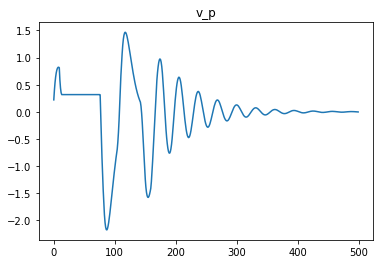

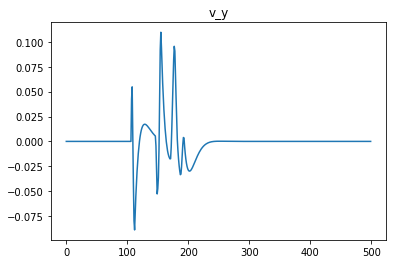

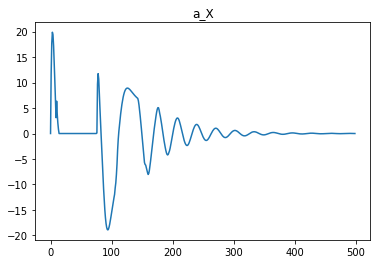

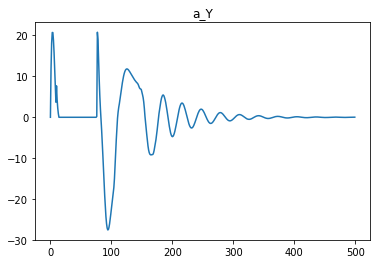

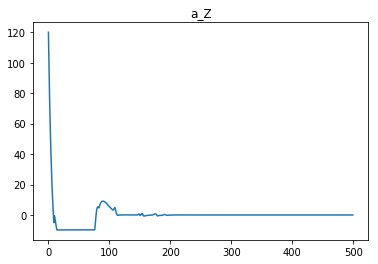

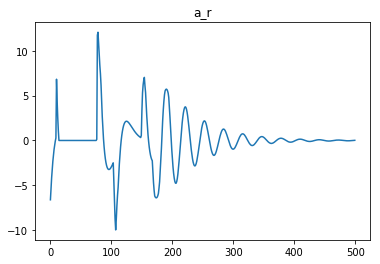

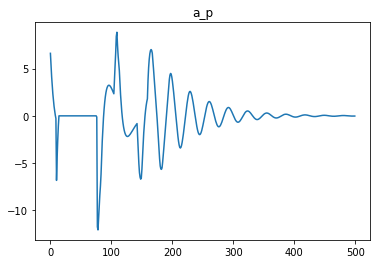

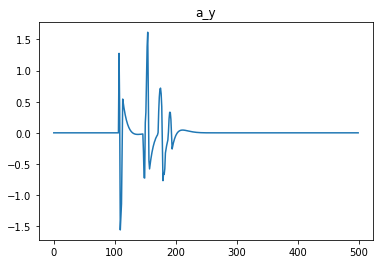

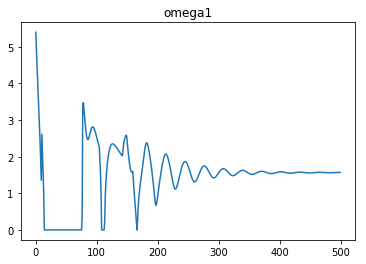

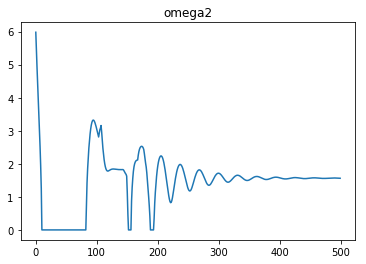

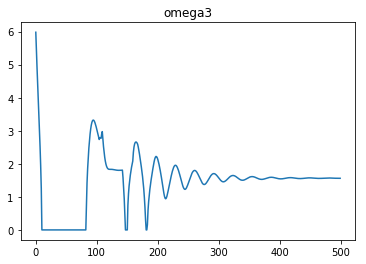

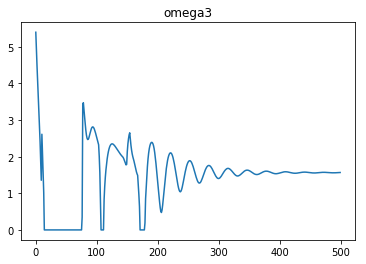

In [32]:
xyz = np.array([0.0, 0.0, 0.0])
rpy = np.array([0.0, 0.0, 0.0])
drone = Drone(xyz, rpy, v_xyz=(0,0,0), v_rpy=(0,0,0), 
                 I=(1,1,1), m=1, b=1, l=1, d=1)
controller_xyz = PIDControler(12.0, 0.001, 0.0001)
controller_rpy = PIDControler(12.0, 0.001, 0.0001)
drone_controller = DroneController(drone, controller_xyz, controller_rpy)

length = 500

xyz_target_arr = np.zeros([length, 3])
xyz_target_arr[:,2] = 10
xyz_target_arr[:,0] = 10
xyz_target_arr[:,1] = 10

#rpy_target_arr = np.zeros([length, 3])
psi_target_arr = np.zeros(length)

res = simulation(drone_controller, xyz_target_arr, psi_target_arr)